### Анализ бизнес-показателей развлекательного приложения

я - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У меня в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Мне предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

Содержание проекта:
1. Изучение и подготовка данных к анализу
2. Функции для анализа, (с которыми ознакомились в теоритической части спринта), для вычисления LTV, ROI, удержания и конверсии
3. Исследовательский анализ данных
4. Оценка окупаемости
5. Выводы

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
# загружаем датасеты для исследования
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#циклом выведем базовую инфу по таблицам
tabs = [visits, orders, costs]
for tab in tabs:
    tab.info()
    print('')
    print('названия столбцев', tab.columns)
    print('')
    print('размер таблицы:', tab.shape)
    print('')
    print('количество пропусков:', '\n', tab.isna().sum())
    print('')
    print('количество явных дубликатов:', tab.duplicated().sum())
    print('')
    display(tab.head(3))
    print('')
    print('--------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

названия столбцев Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

размер таблицы: (309901, 6)

количество пропусков: 
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

количество явных дубликатов: 0



,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08



--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

названия столбцев Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

размер таблицы: (40212, 3)

количество пропусков: 
 User Id     0
Event Dt    0
Revenue     0
dtype: int64

количество явных дубликатов: 0



,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99



--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

названия столбцев Index(['dt', 'Channel', 'costs'], dtype='object')

размер таблицы: (1800, 3)

количество пропусков: 
 dt         0
Channel    0
costs      0
dtype: int64

количество явных дубликатов: 0



,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8



--------------------------------------------------


In [6]:
# приведем названия колонок в единый стиль - все названия с маленькой буквы и вместо пробелов подстрочный дефис
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')
costs.columns = costs.columns.str.replace(' ', '_')

# проверяем
tabs = [visits, orders, costs]
for tab in tabs:
    print('названия столбцев', tab.columns)

названия столбцев Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
названия столбцев Index(['user_id', 'event_dt', 'revenue'], dtype='object')
названия столбцев Index(['dt', 'channel', 'costs'], dtype='object')


In [7]:
# приведем данные в нужные типы
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])


## Вывод 
Данные хорошего качества, без пропусков и дубликатов. Для удобства в работе был изменен формат заголовков и типы временных данных

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [95]:
def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'cac'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'cac': 'mean'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [109]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    sessions['event_dt'] = pd.to_datetime(sessions['session_start'].dt.date)
    
    result_raw = result_raw.merge(
        sessions[['user_id', 'event_dt']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [106]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [30]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (sessions
                   .sort_values(['user_id','session_start'])
                   .groupby('user_id')
                   .agg({'session_start':'first',
                         'channel':'first',
                         'region':'first',
                         'device':'first'})
                   .rename(columns={'session_start':'first_session'})
                   .reset_index()
                )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_session'].dt.date)
    profiles['month'] = profiles['first_session'].dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles
                .groupby(['dt','channel'])
                .agg({'user_id':'nunique'})
                .reset_index()
                .rename(columns={'user_id':'unique_users'})
                )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = new_users.merge(costs,on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['cac'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt','channel','cac']], on=['dt','channel'], how='left')
   
    # стоимость привлечения органических пользователей равна нулю
    profiles['cac'] = profiles['cac'].fillna(0)

    return profiles

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Вывод
Мы подготовили следущие функции для анализа, с которыми ознакомились в теоритической части спринта

get_profiles() - функция для создания пользовательских профилей

get_retention() - функция для расчёта удержания

get_conversion() - функция для расчёта конверсии

get_ltv_roi() - функция для расчёта LTV и ROI

А также функции для визуализации этих метрик:

filter_data() - функция для сглаживания фрейма

plot_retention() - функция для визуализации удержания

plot_conversion() - функция для визуализации конверсии

plot_ltv_roi() - функция для визуализации LTV и ROI

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [31]:
# построим профили пользователей

profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_session,channel,region,device,dt,month,payer,cac
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,10,False,0.230769


In [32]:
# определим минимальную и максимальную дату привлечения пользователей
day_min = profiles['dt'].min()
day_max = profiles['dt'].max()
print(day_min)
print(day_max)

2019-05-01 00:00:00
2019-10-27 00:00:00


In [35]:
# посмотрим из каких стран приходят посетители:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [71]:
# пользователи, которые хоть раз совершали покупку
payers = profiles.query('payer == True')
no_payers = profiles.query('payer != True')
share_payers = len(payers)/len(profiles)
print('Количество пользователей, кто хоть раз сделал покупку:',len(payers)) 
print('Общее количество пользователей:',len(profiles))
print('Доля платящих:{:.2%}'.format(share_payers))

Количество пользователей, кто хоть раз сделал покупку: 8881
Общее количество пользователей: 150008
Доля платящих:5.92%


In [47]:
# страны, которые дают больше всего платящих пользователей
regions = (profiles
           .groupby('region')
           .agg({'user_id':'count', 'payer':'sum', })
           .sort_values('user_id', ascending=False)
           .rename(columns={'user_id':'total_users'}))
regions['payer_prc%'] = (regions['payer'] / regions['total_users'] * 100).round(2)
display(regions)

,total_users,payer,payer_prc%
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


США - страна которая богата не только пользователями, но еще и теми, кто готов платить деньги. Почти 7% американских пользователей готовы сделать первую покупку. Вторая по платежеспособности является Германия - 4,1%. У Франции и Англии показатели примерно одинаковые по общему количесву пользователей и по количеству кто сделал первую покупку, это 3,8% и 3,9%

In [51]:
# устройства, с которых чаще всего заходят платящие пользователи
devices = (profiles
           .groupby('device')
           .agg({'user_id':'count', 'payer':'sum', })
           .sort_values('user_id', ascending=False)
           .rename(columns={'user_id':'total_users'}))
devices['payer_prc%'] = (devices['payer'] / devices['total_users'] * 100).round(2)
display(devices)

,total_users,payer,payer_prc%
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


Самое популярное устройство с которого заходят платящие пользователи - это Mac - 6,4%, второе место - это iPhone - 6,2%, На третьем месте Андроид - это 5,9%. И самы не популярный - это РС - чуть более 5%

In [52]:
#  каналы, которые приносят больше всего платящих пользователей
channels = (profiles
           .groupby('channel')
           .agg({'user_id':'count', 'payer':'sum', })
           .sort_values('user_id', ascending=False)
           .rename(columns={'user_id':'total_users'}))
channels['payer_prc%'] = (channels['payer'] / channels['total_users'] * 100).round(2)
display(channels)


,total_users,payer,payer_prc%
channel,,,
organic,56439,1160,2.06
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
OppleCreativeMedia,8605,233,2.71
LeapBob,8553,262,3.06
WahooNetBanner,8553,453,5.30
RocketSuperAds,4448,352,7.91
MediaTornado,4364,156,3.57
YRabbit,4312,165,3.83


Самая высока конверсия в канале FaceBoom - 12,2%; AdNonSense - 11,3%; lambdaMediaAds - 10,5%; TipTop - 9,6%

## Вывод
Общее количество пользователей, доступных для анализа - 150008

Количество пользователей, кто хоть раз сделал покупку - 8881

Из них доля платящих - 5.92%

Разбивка по странам: 

США - страна которая богата не только пользователями, но еще и теми, кто готов платить деньги. Почти 7% американских пользователей готовы сделать первую покупку. Вторая по платежеспособности является Германия - 4,1%. У Франции и Англии показатели примерно одинаковые по общему количесву пользователей и по количеству кто сделал первую покупку, это 3,8% и 3,9%

Разбивка по девайсам:

Самое популярное устройство с которого заходят платящие пользователи - это Mac - 6,4%, второе место - это iPhone - 6,2%, На третьем месте Андроид - это 5,9%. И самы не популярный - это РС - чуть более 5%

Разбивка по каналам привлечения:

Самая высока конверсия в канале FaceBoom - 12,2%; AdNonSense - 11,3%; lambdaMediaAds - 10,5%; TipTop - 9,6%

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [76]:
#найдем общую сумму расходов на рекламу
total = (costs['costs'].sum()).round(2)
print("Общая сумма расходов на рекламу:",total)

Общая сумма расходов на рекламу: 105497.3


In [86]:
# найдем распределение трат по источникам:

total_channels = (costs
                .groupby('channel')
                .agg({'costs': 'sum','dt':'count'})
                .sort_values('costs', ascending = False)
                .rename(columns = {'costs':'total_by_channel', 'dt':'days'}))
total_channels['%'] = (total_channels['total_by_channel'] / total * 100).round(2)
display(total_channels)

,total_by_channel,days,%
channel,,,
TipTop,54751.30,180,51.90
FaceBoom,32445.60,180,30.75
WahooNetBanner,5151.00,180,4.88
AdNonSense,3911.25,180,3.71
OppleCreativeMedia,2151.25,180,2.04
RocketSuperAds,1833.00,180,1.74
LeapBob,1797.60,180,1.70
lambdaMediaAds,1557.60,180,1.48
MediaTornado,954.48,180,0.90


Text(0.5, 1.0, 'Суммарные расходы на рекламу по каналам привлечения')

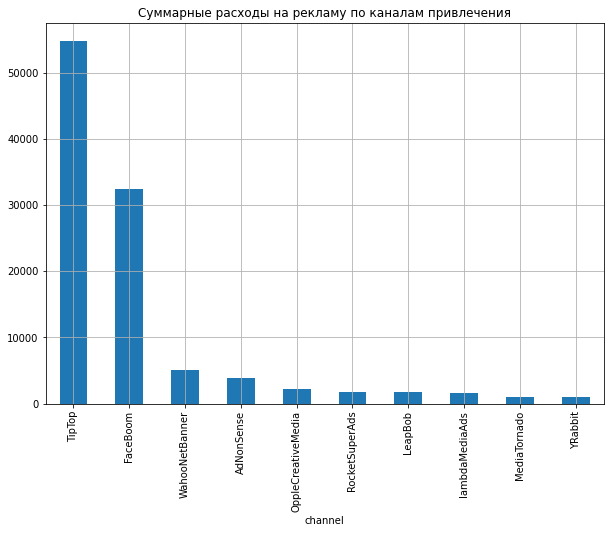

In [85]:
total_channels['total_by_channel'].plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Суммарные расходы на рекламу по каналам привлечения')

Text(0.5, 1.0, 'Динамика расходов на рекламу по каналам привлечения')

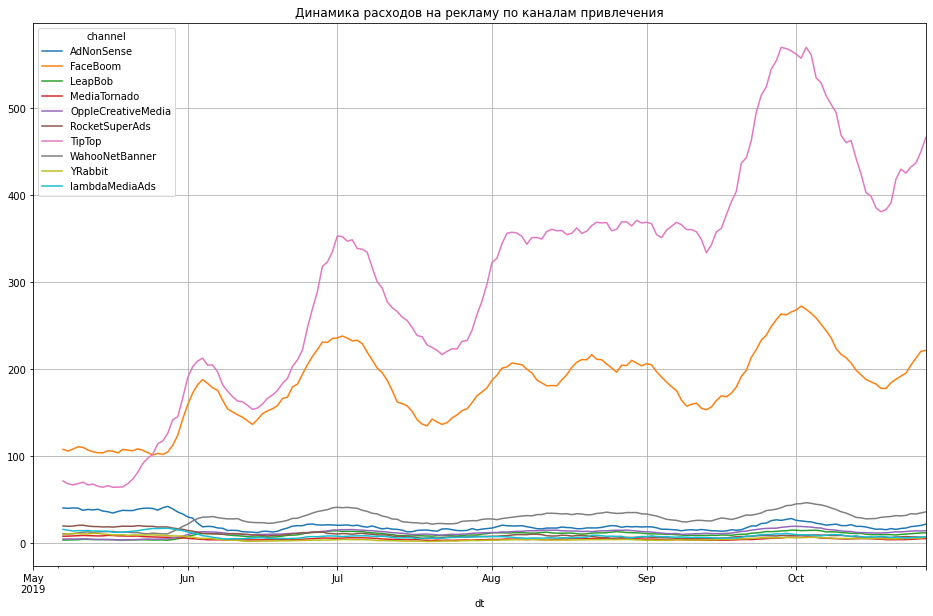

In [87]:
(filter_data(costs.pivot_table(values='costs', index='dt', columns='channel'), window=7)
      .plot(figsize=(16,10), grid=True))
plt.title('Динамика расходов на рекламу по каналам привлечения')

Общая сумма расходов на рекламу: 105497.3
Наибольшие затраты на рекламу приходятся на два канала привлечения TipTop и FaceBoom - более 80% всех затрат.
При этом в отличие от остальных каналов, затраты на рекламу для этих двух каналов не постоянны, а растут со временем. За полгода затраты на рекламу в TipTop выросли в 5 раз. Затраты на FaceBoom - в 2 раза.

In [89]:
# расчет САС
cac_total = costs['costs'].sum() / profiles.query('channel != "organic"')['user_id'].nunique()
print('Cовокупные затраты компании на привлечение одного покупателя:',(cac_total).round(2))

Cовокупные затраты компании на привлечение одного покупателя: 1.13


In [92]:
# расчет стоимости привлечения одного покупателя по каналам
cac_per_channel = ((costs
                   .groupby('channel')['costs']
                   .sum() / profiles.groupby('channel')['user_id'].nunique()).round(2))
cac_per_channel.sort_values(ascending=False)

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.22
LeapBob               0.21
organic                NaN
dtype: float64

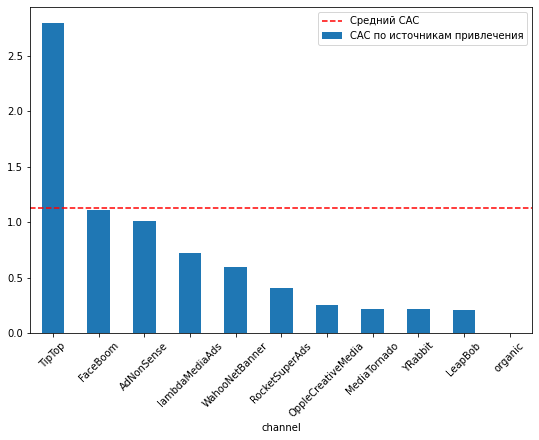

In [93]:
(cac_per_channel
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(9,6), rot=45)
)

plt.axhline(y=cac_total, color='red', linestyle='--')
plt.legend(labels=['Средний CAC','CAC по источникам привлечения'])

В целом стоимость привлечения одного пользователя равна 1,12. В данном случае мы не учитываем органический трафик, так как он может сильно повлиять на выводы по эффективности рекламных кампаний.

CAC для TipTop более чем в 2 раза выше среднего. Учитывая, что на TipTop приходится половина рекламного бюджета, наша компания тратит очень много денег на самый неэффективный с точки зрения CAC метод привлечения пользователей. В дальнейшем следует подробнее рассмотреть данный канал привлечения, и, возможно, пересмотреть рекламный бюджет.

## Вывод

Общая сумма расходов на рекламу: 105497.3

Cовокупные затраты компании на привлечение одного покупателя: 1.13

Общая сумма расходов на рекламу: 105497.3 Наибольшие затраты на рекламу приходятся на два канала привлечения TipTop и FaceBoom - более 80% всех затрат. При этом в отличие от остальных каналов, затраты на рекламу для этих двух каналов не постоянны, а растут со временем. За полгода затраты на рекламу в TipTop выросли в 5 раз. Затраты на FaceBoom - в 2 раза.

В целом стоимость привлечения одного пользователя равна 1,13. В данном случае мы не учитываем органический трафик, так как он может сильно повлиять на выводы по эффективности рекламных кампаний.

CAC для TipTop более чем в 2 раза выше среднего. Учитывая, что на TipTop приходится половина рекламного бюджета, наша компания тратит очень много денег на самый неэффективный с точки зрения CAC метод привлечения пользователей. В дальнейшем следует подробнее рассмотреть данный канал привлечения, и, возможно, пересмотреть рекламный бюджет.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, стоит обратить на эти каналы особое внимание

</div>


# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [96]:
# Общий LTV, ROI и CAC
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi(profiles.query('channel != "organic"'),
                                                          orders,
                                                          pd.datetime(2019, 11, 1),
                                                          horizon_days = 14,
                                                          dimensions=[],
                                                          ignore_horizon=False)

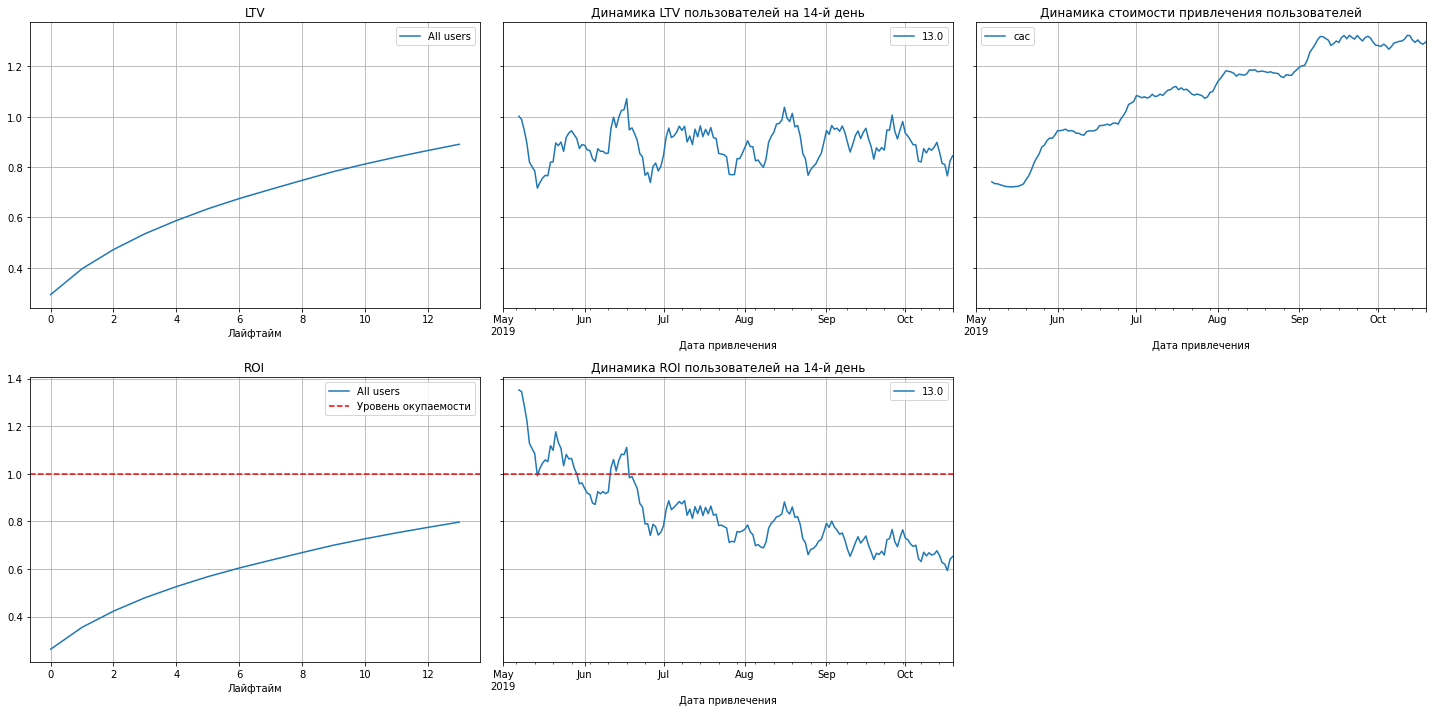

In [97]:
# посттроим графиги с помощью заранее подготовленных функций
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=7)

Как видно из графика ROI - реклама не окупается. ROI в конце недели - около 80%. Судя по графику динамики ROI за весь период - реклама окупалась до июня, а после этого ROI постепенно снижался.
При этом стоимость привлечения новых пользователей (САС) постоянно растет
Заметны ежемесячные повторяющиеся колебания LTV. LTV пользователей на 14 день изменяется от 0,8 до 1.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [98]:
# Разбивка по каналам привлечения, чтобы определить наименнее результативные рекламные каналы
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi(profiles.query('channel != "organic"'),
                                                          orders,
                                                          pd.datetime(2019, 11, 1),
                                                          horizon_days = 14,
                                                          dimensions=['channel'],
                                                          ignore_horizon=False)### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

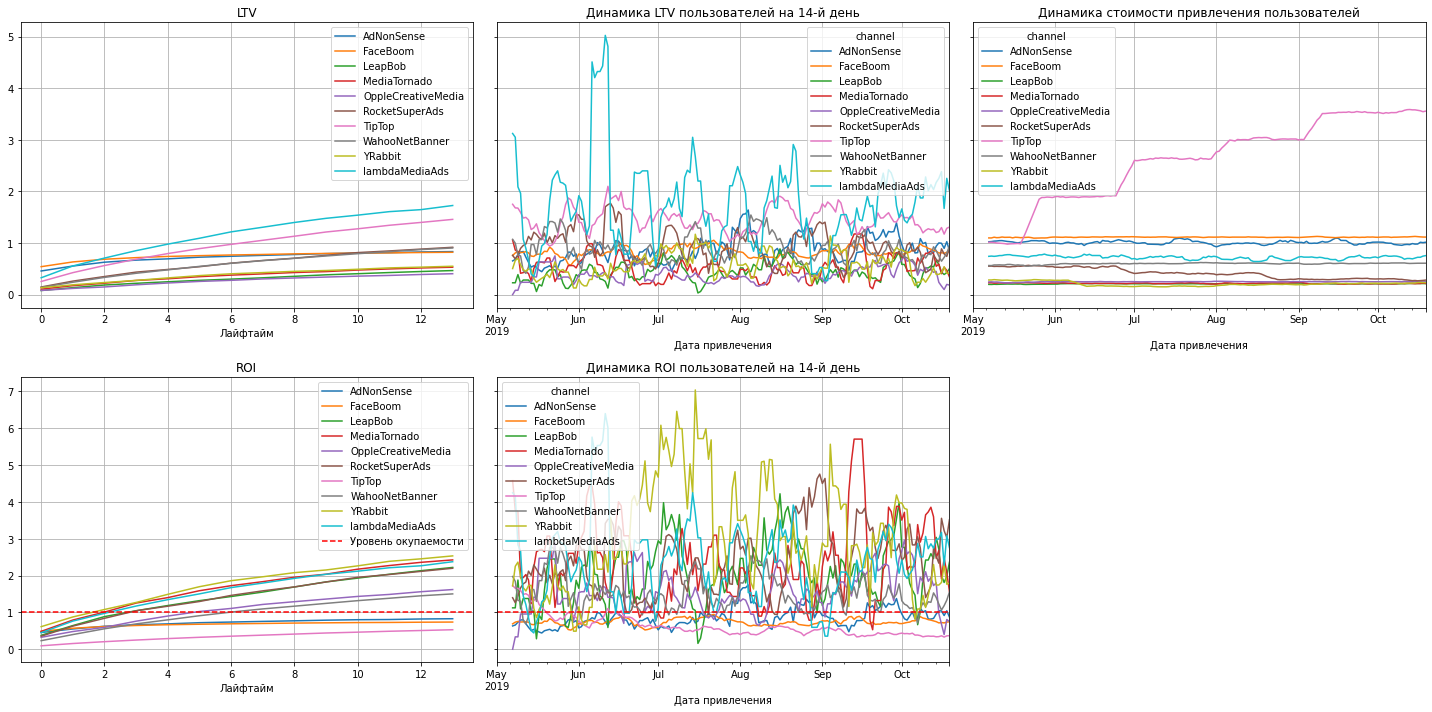

In [99]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=7)

Из графика ROI видно, что лишь 3 рекламные кампании не окупаются за 14 дней. Это TipTop, FaceBoom и AdNonSense. Из графика динамики ROI следует, что реклама в TipTop окупалась только в первые недели марта, а реклама в FaceBoom и AdNonSense не окупалась практически никогда.

Явные фавориты по окупаемости - YRabbit,MediaTornado,lambdaMediaAds и RocketSuperADS. На 14 день окупаемость этих рекламных кампаний от 200 до 250%.

Как видно из графика динамики CAC, стоимости большинства рекламных кампаний довольно стаблильны. На их фоне выделяется реклама в TipTop. С мая по ноябрь стоимость привлечения пользователей в TipTop выросла в 3,5 раза. В то время как CAC в RocketSuperAds за тот же период снизилась в 2 раза.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [100]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi(profiles.query('channel != "organic"'),
                                                          orders,
                                                          pd.datetime(2019, 11, 1),
                                                          horizon_days = 14,
                                                          dimensions=['device'],
                                                          ignore_horizon=False)


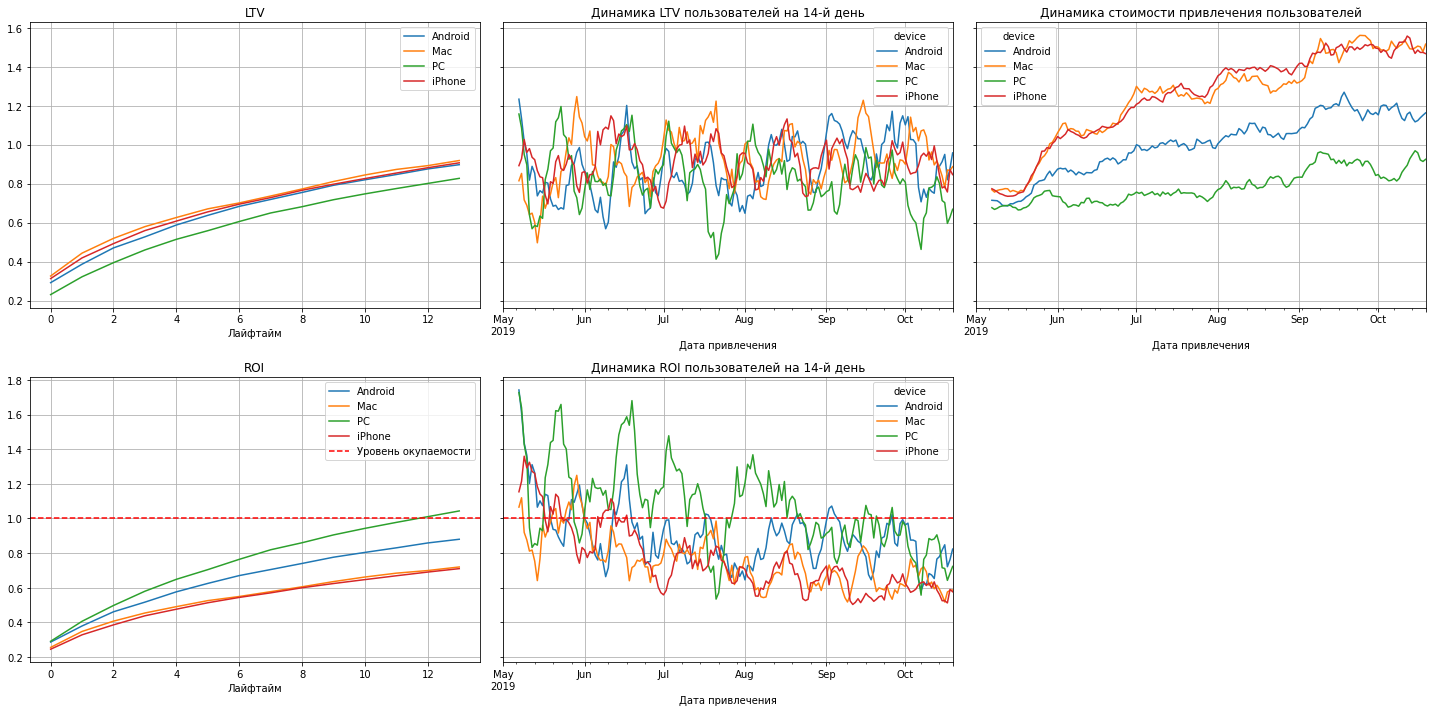

In [101]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=7)

Как видно из графиков, на 14 день окупается только реклама на PC. Iphone и Mac - наиболее убыточные платформы.

На графике динамики CAC видно, что затраты на рекламу в мае для разных устройств примерно равны. Со временем затраты на рекламу для Iphone и Mac значительно растут (в 2 раза за полгода), в то время как CAC для PC вырос всего на 25-30%. На Android стоимость привлечения пользователей за наблюдаемый период выросла примерно на 60%.

Реклама на Iphone, Mac и Android не окупается в связи с тем, что стоимость привлечения пользователей для платформ Iphone, Mac и Android растет быстрее, чем выгода, получаемая от этих самых пользователей.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [102]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi(profiles.query('channel != "organic"'),
                                                          orders,
                                                          pd.datetime(2019, 11, 1),
                                                          horizon_days = 14,
                                                          dimensions=['region'],
                                                          ignore_horizon=False)

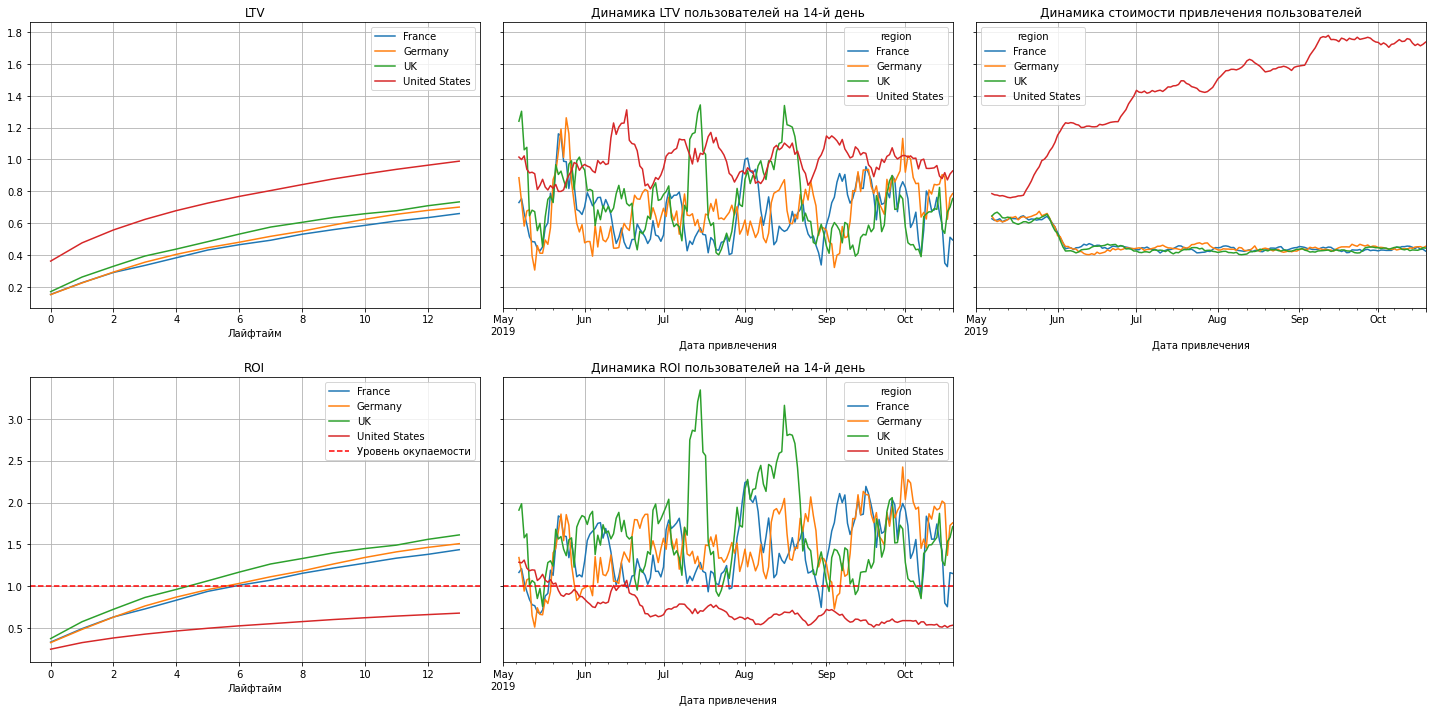

In [103]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=7)


На графиках явно отличается от остальных стран реклама в США. LTV пользователей из США примерно на треть выше остальных регионов. При этом CAC пользователей из США постоянно растет, в то время как для остальных регионов - падает. Разница CAC к ноябрю - в 4 раза.

Отсюда следует и расхождение в ROI между странами. Окупаются все другие регионы кроме США. ROI других стран - на уровне 1,5. ROI США - 0,6.

Кроме этого, график динамики CAC для всех пользоваьелей крайне похож на график CAC для США. Это может означать, что большая часть затрат на рекламу приходится на США, остальные страны намного меньше влияют на затраты.

###  Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

In [107]:
# Общие конверсия и удержание
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('channel != "organic"'),
                                                                orders,
                                                                pd.datetime(2019, 11, 1),
                                                                horizon_days = 14,
                                                                dimensions=[],
                                                                ignore_horizon=False)

In [110]:
retention_raw, retention, retention_history = get_retention(profiles.query('channel != "organic"'),
                                                            visits,
                                                            pd.datetime(2019, 11, 1),
                                                            horizon_days = 14,
                                                            dimensions=[],
                                                            ignore_horizon=False)

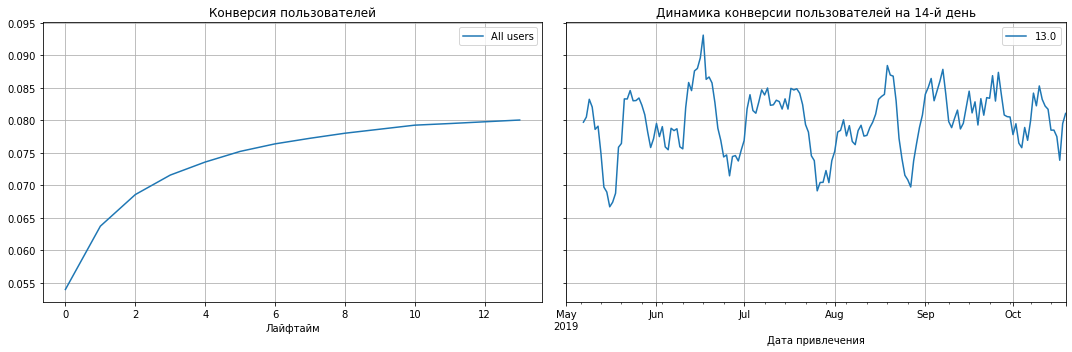

In [111]:
plot_conversion(conversion, conversion_history, horizon=14, window=7)

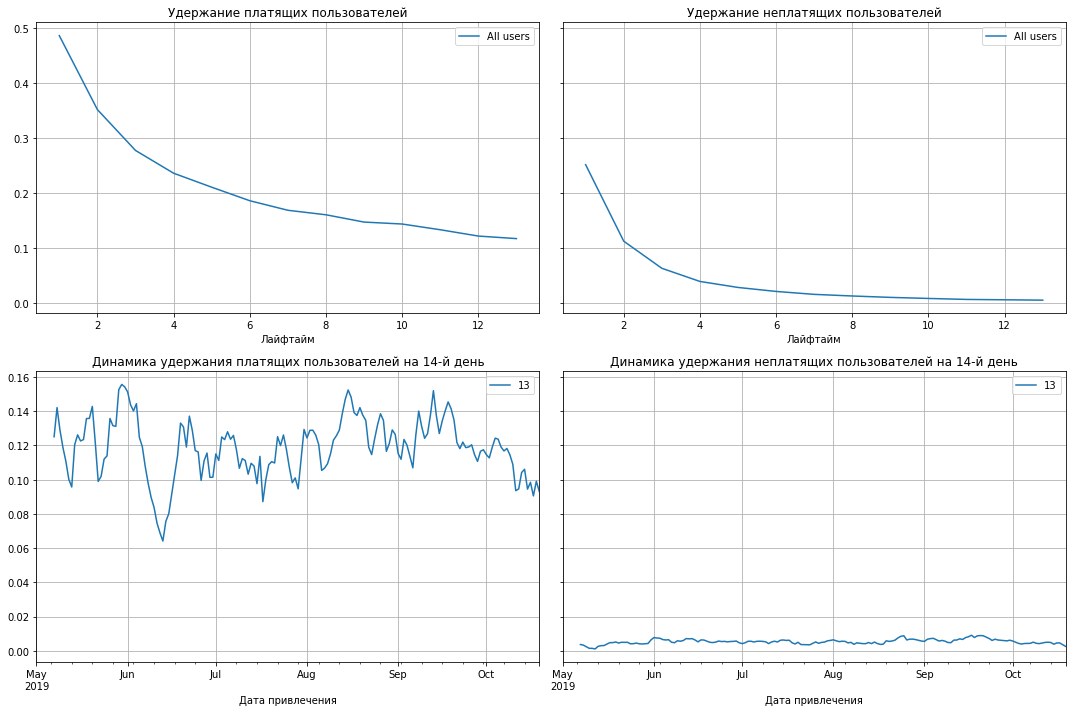

In [112]:
plot_retention(retention, retention_history, horizon=14, window=7)

Судя по графикам, конверсия пользователей достаточно стабильна и на 14 день находится в диапазоне 0,07 до 0,09.

Удержание платящих пользователей на 14 день колеблется от 8% до 14% со средним значением удержания - 11%.

Удержание неплатящих пользователей на 14 день - около 0,5%.

In [113]:
# По каналам привлечения
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('channel != "organic"'),
                                                                orders,
                                                                pd.datetime(2019, 11, 1),
                                                                horizon_days = 14,
                                                                dimensions=['channel'],
                                                                ignore_horizon=False)

In [114]:
retention_raw, retention, retention_history = get_retention(profiles.query('channel != "organic"'),
                                                            visits,
                                                            pd.datetime(2019, 11, 1),
                                                            horizon_days = 14,
                                                            dimensions=['channel'],
                                                            ignore_horizon=False)

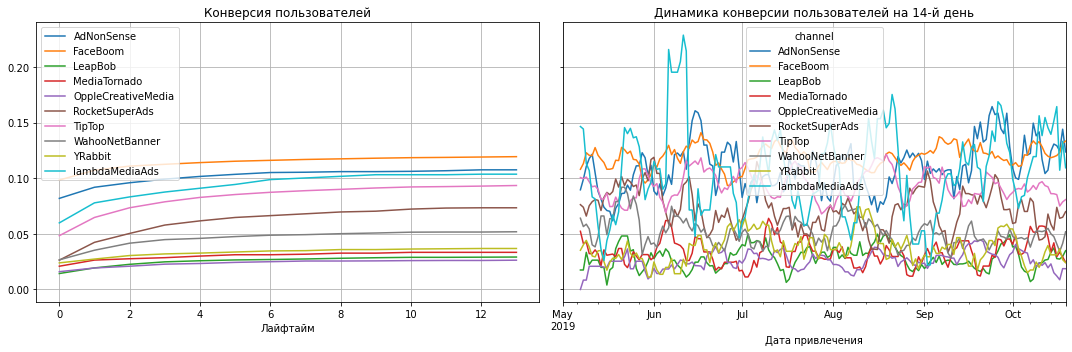

In [115]:
plot_conversion(conversion, conversion_history, horizon=14, window=7)

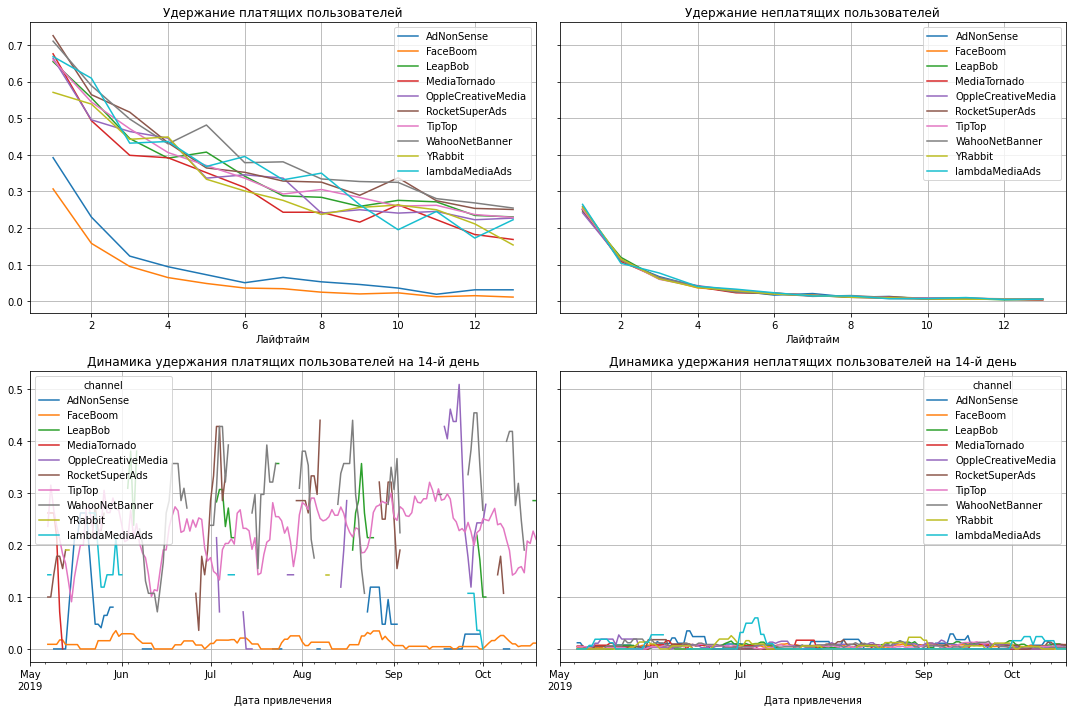

In [116]:
plot_retention(retention, retention_history, horizon=14, window=7)

На графиках удержания и конверсии следует более подробно рассмотреть значения для TipTop, AdNonSense и FaceBoom, так как рекламные кампании в этих каналах не окупаются.

Из графиков конверсии следует, что пользователи, пришедшие из этих каналов очень хорошо конвертируются, лучше чем остальные каналы. Значит следует рассмотреть удержание.

Удержание пользователей из каналов AdNonSense и FaceBoom крайне низкое - на уровне удержания для неплатящих пользователей. и на 14 день составляет от 1 до 3%.

При этом удержание пользователей из канала TipTop достаточно хорошее, выше 20%. Плохая окупаемость рекламы скорее всего связана с высокой стоимостью привлечения CAC.

In [117]:
# по странам
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('channel != "organic"'),
                                                                orders,
                                                                pd.datetime(2019, 11, 1),
                                                                horizon_days = 14,
                                                                dimensions=['region'],
                                                                ignore_horizon=False)

In [118]:
retention_raw, retention, retention_history = get_retention(profiles.query('channel != "organic"'),
                                                            visits,
                                                            pd.datetime(2019, 11, 1),
                                                            horizon_days = 14,
                                                            dimensions=['region'],
                                                            ignore_horizon=False)

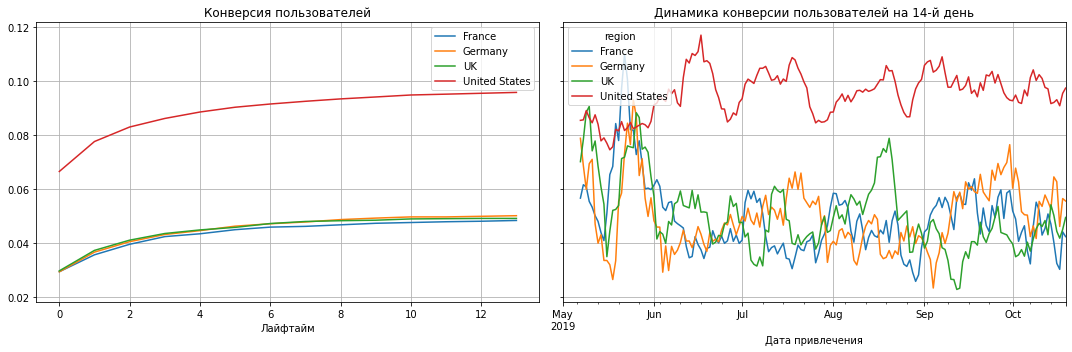

In [119]:
plot_conversion(conversion, conversion_history, horizon=14, window=7)

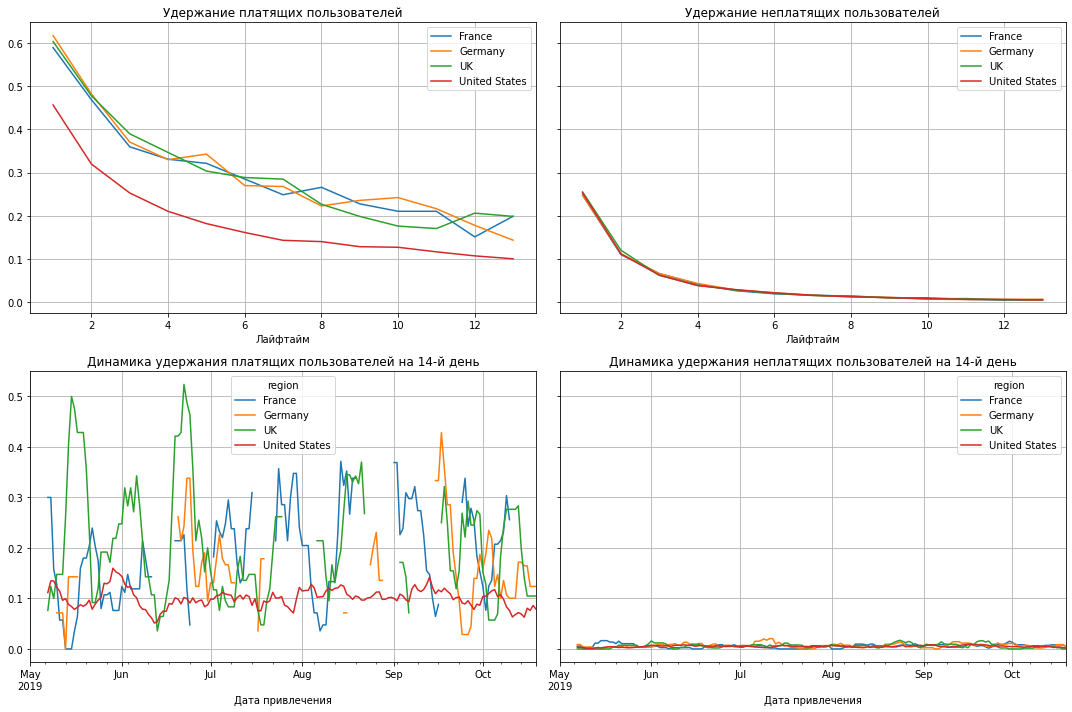

In [120]:
plot_retention(retention, retention_history, horizon=14, window=7)

На графиках явно выделяются пользователи США. Они стабильно хорошо конвертируются, при этом также стабильно плохо удерживаются. Конверсия пользователей США примерно в 2 раза выше других стран. Удержание пользователей из США в свою очередь в 2 раза ниже, чем у других стран.

In [121]:
# по устройствам
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('channel != "organic"'),
                                                                orders,
                                                                pd.datetime(2019, 11, 1),
                                                                horizon_days = 14,
                                                                dimensions=['device'],
                                                                ignore_horizon=False)

In [122]:
retention_raw, retention, retention_history = get_retention(profiles.query('channel != "organic" '),
                                                            visits,
                                                            pd.datetime(2019, 11, 1),
                                                            horizon_days = 14,
                                                            dimensions=['device'],
                                                            ignore_horizon=False)

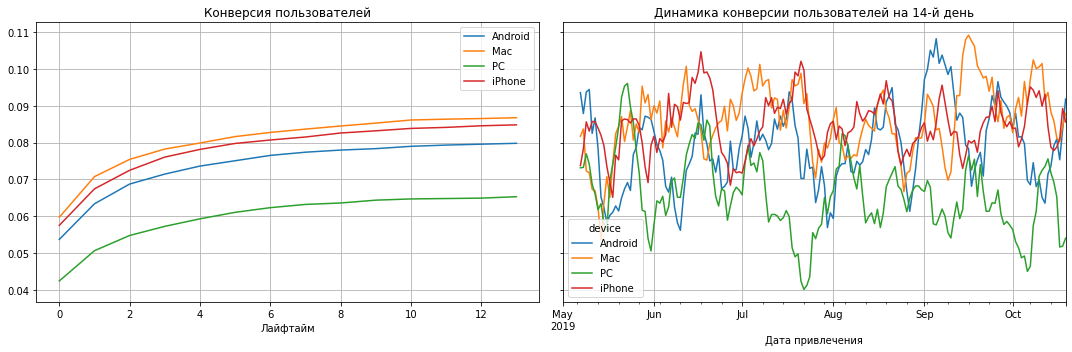

In [123]:
plot_conversion(conversion, conversion_history, horizon=14, window=7)

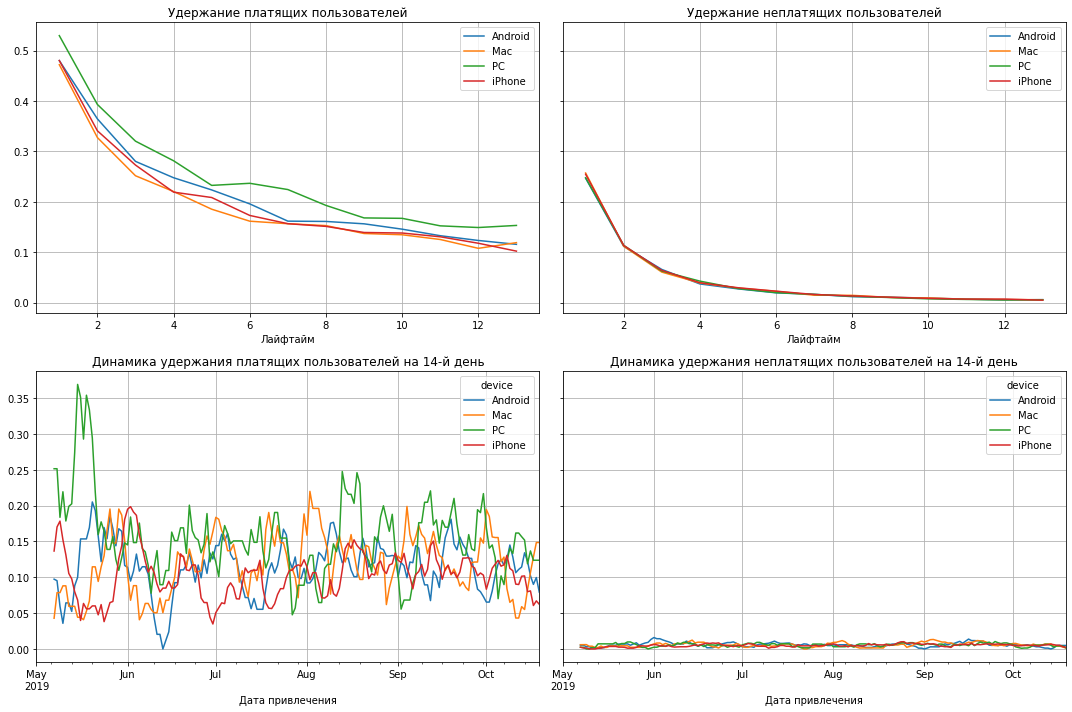

In [124]:
plot_retention(retention, retention_history, horizon=14, window=7)


Среди устройств явным аутсайдером по конверсии является PC (примерно на 30% ниже, чем у других устройств). Учитывая хорошее удержание пользователей на PC, это может происходить из-за конкретных рекламных кампаний, которые имеют целью другие платформы, или может быть связано с общим портетом пользователей ПК, которые реже совершают покупки в приложениях.

## Вывод

Как видно из графика ROI - реклама не окупается. ROI в конце недели - около 80%. Судя по графику динамики ROI за весь период - реклама окупалась до июня, а после этого ROI постепенно снижался. При этом стоимость привлечения новых пользователей (САС) постоянно растет Заметны ежемесячные повторяющиеся колебания LTV. LTV пользователей на 14 день изменяется от 0,8 до 1.

Из графика ROI видно, что лишь 3 рекламные кампании не окупаются за 14 дней. Это TipTop, FaceBoom и AdNonSense. Из графика динамики ROI следует, что реклама в TipTop окупалась только в первые недели марта, а реклама в FaceBoom и AdNonSense не окупалась практически никогда.

Явные фавориты по окупаемости - YRabbit,MediaTornado,lambdaMediaAds и RocketSuperADS. На 14 день окупаемость этих рекламных кампаний от 200 до 250%.

Как видно из графика динамики CAC, стоимости большинства рекламных кампаний довольно стаблильны. На их фоне выделяется реклама в TipTop. С мая по ноябрь стоимость привлечения пользователей в TipTop выросла в 3,5 раза. В то время как CAC в RocketSuperAds за тот же период снизилась в 2 раза.

Как видно из графиков, на 14 день окупается только реклама на PC. Iphone и Mac - наиболее убыточные платформы.

На графике динамики CAC видно, что затраты на рекламу в мае для разных устройств примерно равны. Со временем затраты на рекламу для Iphone и Mac значительно растут (в 2 раза за полгода), в то время как CAC для PC вырос всего на 25-30%. На Android стоимость привлечения пользователей за наблюдаемый период выросла примерно на 60%.

Реклама на Iphone, Mac и Android не окупается в связи с тем, что стоимость привлечения пользователей для платформ Iphone, Mac и Android растет быстрее, чем выгода, получаемая от этих самых пользователей.


На графиках явно отличается от остальных стран реклама в США. LTV пользователей из США примерно на треть выше остальных регионов. При этом CAC пользователей из США постоянно растет, в то время как для остальных регионов - падает. Разница CAC к ноябрю - в 4 раза.

Отсюда следует и расхождение в ROI между странами. Окупаются все другие регионы кроме США. ROI других стран - на уровне 1,5. ROI США - 0,6.

Кроме этого, график динамики CAC для всех пользоваьелей крайне похож на график CAC для США. Это может означать, что большая часть затрат на рекламу приходится на США, остальные страны намного меньше влияют на затраты.


Судя по графикам, конверсия пользователей достаточно стабильна и на 14 день находится в диапазоне 0,07 до 0,09.

Удержание платящих пользователей на 14 день колеблется от 8% до 14% со средним значением удержания - 11%.

Удержание неплатящих пользователей на 14 день - около 0,5%.


На графиках удержания и конверсии следует более подробно рассмотреть значения для TipTop, AdNonSense и FaceBoom, так как рекламные кампании в этих каналах не окупаются.

Из графиков конверсии следует, что пользователи, пришедшие из этих каналов очень хорошо конвертируются, лучше чем остальные каналы. Значит следует рассмотреть удержание.

Удержание пользователей из каналов AdNonSense и FaceBoom крайне низкое - на уровне удержания для неплатящих пользователей. и на 14 день составляет от 1 до 3%.

При этом удержание пользователей из канала TipTop достаточно хорошее, выше 20%. Плохая окупаемость рекламы скорее всего связана с высокой стоимостью привлечения CAC.


На графиках явно выделяются пользователи США. Они стабильно хорошо конвертируются, при этом также стабильно плохо удерживаются. Конверсия пользователей США примерно в 2 раза выше других стран. Удержание пользователей из США в свою очередь в 2 раза ниже, чем у других стран.

Среди устройств явным аутсайдером по конверсии является PC (примерно на 30% ниже, чем у других устройств). Учитывая хорошее удержание пользователей на PC, это может происходить из-за конкретных рекламных кампаний, которые имеют целью другие платформы, или может быть связано с общим портетом пользователей ПК, которые реже совершают покупки в приложениях.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Причины неэффективности привлечения пользователей:

    увеличение трат на неэффективные каналы привлечения:

    Хотя TipTop и FaceBoom генерируют очень большой трафик, эти каналы привлечения и обходятся нам намного дороже. Поэтому в колличественном соотношении мы видим хороший прирост пользователей, но в пересчете на CAC эти каналы оказываются крайне неэффективными. И дополнительное увеличение расходов на эти каналы не приносит увеличения эффективности.
    Также каналы с высокими затратами на рекламу (FaceBoom и AdNonSense) имеют очень плохое удержание. Наша компания платит за то, чтобы более 95% пользователей ушли от нас через 14 дней. При этом показатели конверсии для этих источнкиов привлечения - одни из самых высоких. Скорее всего пользователь после перехода по рекламе совершает покупку в приложении, и на этом останавливается. Возможно, в рекламной кампании неправильно представлен наш продукт. Или в рекламе выдают промокод на скидку, пользователь тратит ее на одну покупку, а без скидки покупать уже ничего не хочет. Возможно, мы рекламируемся не для нашей целевой аудитории.

Рекомендации:

    Снизить траты на неэффективные каналы привлечения, увеличить закупку рекламы в самых эффективных каналах
    Разобраться в причинах низкого удержания для неэффективных рекламных кампаний.
    Диверсифицировать и сбалансировать затраты на рекламу: 80% трат на рекламу приходятся только на 2 источника трафика, к тому же крайне неэффективных.
    Также следует выделить источники привлечения, наиболее эффективные для конкретной страны.

Наиболее переспективные каналы привлечения:

MediaTornado
RocketSuperAds
YRabbit
LeapBob
lambdaMediaAds

    Хотя эти каналы привлечения не всегда показывают высокую конверсию, они имеют хорошие показатели удержания и высокий ROI. Учитывая, что на них приходится лишь малая доля нашего рекламного бюджета, следует рассмотреть возможность перенаправить затраты с убыточных направлений на эти каналы.

